## Assignment 1 Part 1

In [8]:
# Take value of n (dtype = float) as an input from user and print it 
n = float(input("Enter a number: "))
print("n = " + str(n))

n = 8.0


In [9]:
# Check if the input value is integer or not
# If not integer then keep on taking the values from user until the input value is integer
# And check whether the integral input value is even or odd
while True:
  if(n.is_integer()):
    break
  else:
    print(f"n={n} is not an integer")
    n = float(input("Please enter an integer: "))

if  n%2 == 0:
  print(f"n={n} is even")
else    :
  print(f"n={n} is odd")

n=8.0 is even


In [17]:
# Define an array and take its elements as input
import numpy as np
arr = np.array([[90,69,0,-1,-3],
       [4,2,3,7,406],
       [11,-12,-3,43,33],
       [7,7,-1,-9,-100],
       [100,102,2,1,11]])
print("Array: ", arr)

Array:  [[  90   69    0   -1   -3]
 [   4    2    3    7  406]
 [  11  -12   -3   43   33]
 [   7    7   -1   -9 -100]
 [ 100  102    2    1   11]]


A matrix is said to be **diagonally dominant** provided the
magnitude of the diagonal element of each row is larger than
the sum of the magnitudes of the off-diagonal elemets of that
row

In [18]:
# Implement a function on the matrix
# Function should make each row's diagonal element to be maximum in its row irrespective of sign
# Output the matrix and intermediate steps
import sys

def diagonallyDominant(arr, verbose=False):
    for i in range(arr.shape[0]):
        max_val = -sys.maxsize
        max_index = 0
        for j in range(arr.shape[1]):
            if max_val < abs(arr[i][j]):
                max_index = j
                max_val = arr[i][j]
        arr[i][i], arr[i][max_index] = arr[i][max_index], arr[i][i]

        if verbose and i != max_index:
            print(f"Adjusting Row {i+1}")   
            print(f"Swapped elements {arr[i][i]} and {arr[i][max_index]} in row {i+1}")    
    return arr

print("Original matrix: ")
print(arr)
print("_"*100,"\n")

A = diagonallyDominant(arr, verbose=True)
print("_"*100,"\n")

print("Matrix obtained is: ")
print(A)


Original matrix: 
[[  90   69    0   -1   -3]
 [   4    2    3    7  406]
 [  11  -12   -3   43   33]
 [   7    7   -1   -9 -100]
 [ 100  102    2    1   11]]
____________________________________________________________________________________________________ 

Adjusting Row 2
Swapped elements 406 and 2 in row 2
Adjusting Row 3
Swapped elements 43 and -3 in row 3
Adjusting Row 4
Swapped elements -100 and -9 in row 4
Adjusting Row 5
Swapped elements 102 and 11 in row 5
____________________________________________________________________________________________________ 

Matrix obtained is: 
[[  90   69    0   -1   -3]
 [   4  406    3    7    2]
 [  11  -12   43   -3   33]
 [   7    7   -1 -100   -9]
 [ 100   11    2    1  102]]


In [21]:
## Check the changed matrix (matrix obatined above) is diagonally dominant or not?

row_sum = 0
cnt = 0
arr = A

def check_diagonally_dominant(arr):
  m, n = arr.shape
  cnt = 0
  for i in range(m):
    row_sum = 0
    for j in range(n):
      row_sum += abs(arr[i][j])

  if 2*abs(arr[i][i]) < row_sum:
      return (False,i)
    
  return (True,-1)
    
if check_diagonally_dominant(A)[0]:
  print(f"{A} is diagonally dominant")
  
else:
  print(f"{A} \n is NOT diagonally dominant")
  print(f"Row at which this is not satisfying is {check_diagonally_dominant(A)[1] + 1}")

[[  90   69    0   -1   -3]
 [   4  406    3    7    2]
 [  11  -12   43   -3   33]
 [   7    7   -1 -100   -9]
 [ 100   11    2    1  102]] 
 is NOT diagonally dominant
Row at which this is not satisfying is 5


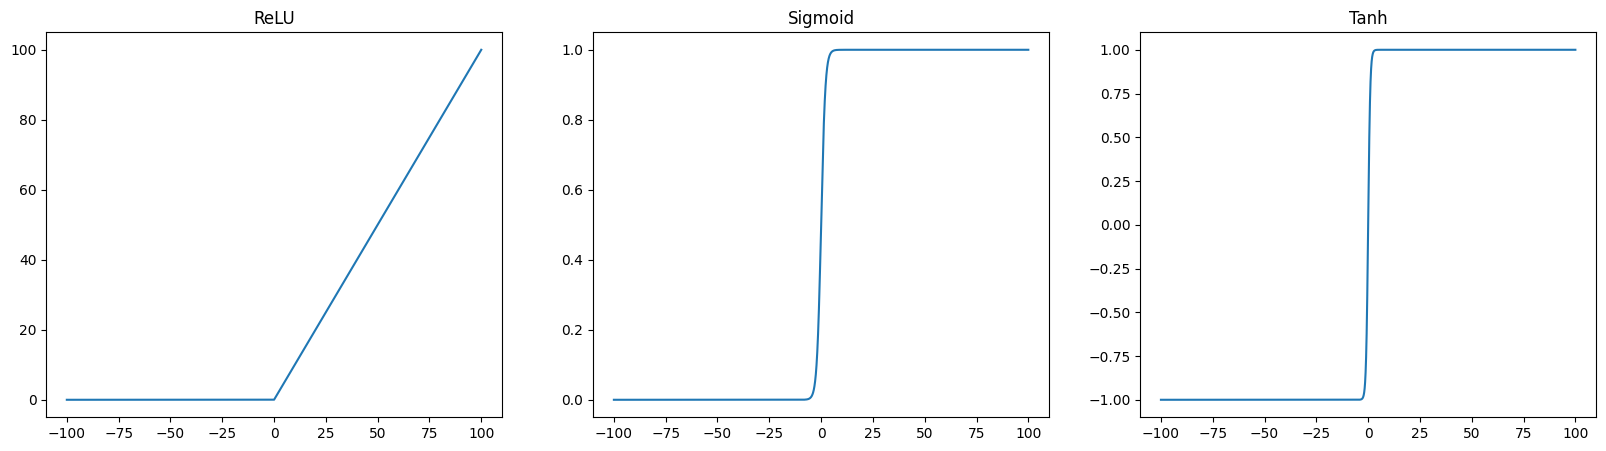

In [23]:
from matplotlib import pyplot as plt
import math

# Plot relu on different graph and sigmoid and tanh activations on same plots from -100 to 100
# just read about their definations as of now

x = np.linspace(-100,100, 10000)
y_relu = []
y_sigmoid = []
y_tanh = []

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0,x)

for i in range (len(x)):
    y_relu.append(relu(x[i]))
    y_sigmoid.append(sigmoid(x[i]))
    y_tanh.append(tanh(x[i]))

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(x, y_relu)
plt.title('ReLU')

plt.subplot(1,3,2)
plt.plot(x, y_sigmoid)
plt.title('Sigmoid')    

plt.subplot(1,3,3)
plt.plot(x, y_tanh)
plt.title('Tanh')

plt.show()

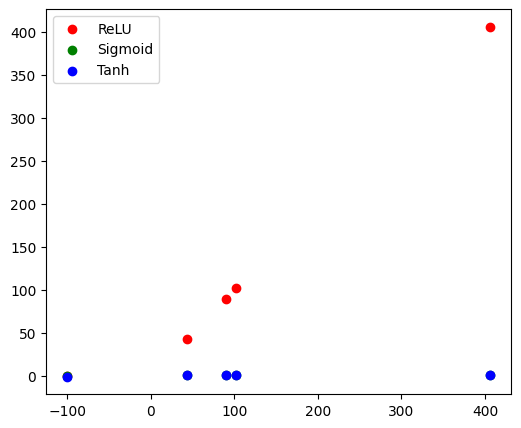

In [28]:
# Plot all the diagonal elements against there ReLu, Sigmoid adn tanh activations on same plot

x = []
y_relu = []
y_sigmoid = []
y_tanh = []

def plot_diag_activation(arr):
    for i in range(arr.shape[0]):
        x.append(arr[i][i])
        y_relu.append(relu(arr[i][i]))
        y_sigmoid.append(sigmoid(arr[i][i]))
        y_tanh.append(tanh(arr[i][i]))

    plt.figure(figsize=(6,5))

    plt.scatter(x, y_relu, color = 'red')
    plt.scatter(x, y_sigmoid, color = 'green')
    plt.scatter(x, y_tanh, color = 'blue')

    plt.legend(['ReLU', 'Sigmoid', 'Tanh'])
    plt.show()

plot_diag_activation(A)


In [30]:
# Read about softmax function's defination / formula
# Define and Implement  softmax function on diagonal elements of the matrix

def softmax(arr):
  diag_elements = np.diag(arr) 
  exp_values = np.exp(diag_elements)
  return exp_values / np.sum(exp_values)

print("Softmax of the diagonal elements of the matrix :\n", softmax(arr))

Softmax of the diagonal elements of the matrix :
 [5.79353612e-138 1.00000000e+000 2.24441452e-158 1.76600593e-220
 9.42925762e-133]


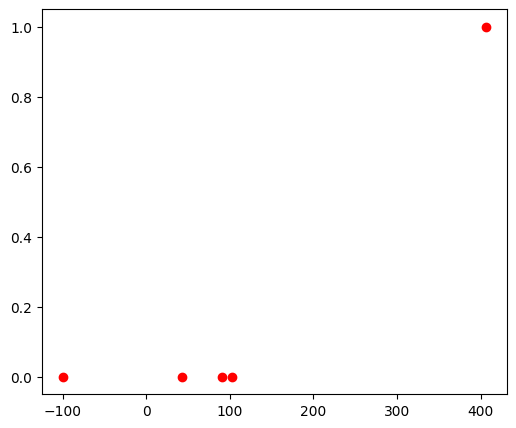

In [31]:
# Plot softmax of the diagonal elements against the diagonal elements

def plot_diag_activation(arr):
    x = []
    y = softmax(arr)
    for i in range(arr.shape[0]):
        x.append(arr[i][i])
    plt.figure(figsize=(6,5))
    plt.scatter(x, y, color = 'red')
    plt.show()

plot_diag_activation(arr)

In [33]:
# usinf softmax and diagonal elements try to find out the max element
# you are not allowed to use max function
# to find index of max element you can use "argmax()" function

y = softmax(arr)
max_index = np.argmax(y)
print(f"Maximum element in the diagonal elements of the matrix is {arr[max_index][max_index]}")

Maximum element in the diagonal elements of the matrix is 406


What Conclusion could you draw from softmax function?







The maximum element has the maximum softmax value